In [104]:
#!pip install nltk

In [105]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
#Loading CSV File
tweet = pd.read_csv('Data\judge-1377884607_tweet_product_company.csv',encoding= 'unicode_escape')

## EDA

In [107]:
#Checking 5 first rows in csv file
tweet.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [108]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [109]:
#Checking null values
tweet.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [ ]:
#Dropping null values
tweet.dropna(axis=0, inplace=True)

Dropping null values, although this is a lot of data to lose, since we're checking to see peoples sentiment towards a brand/company.  It makes sense to drop values where the tweets are not towards a specific brand/company.

In [110]:
#Checking values for emotions towards brands
tweet["emotion_in_tweet_is_directed_at"].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [111]:
#Renaming column for ease of use
tweet.rename({'emotion_in_tweet_is_directed_at':'directed_at'}, axis=1, inplace=True)

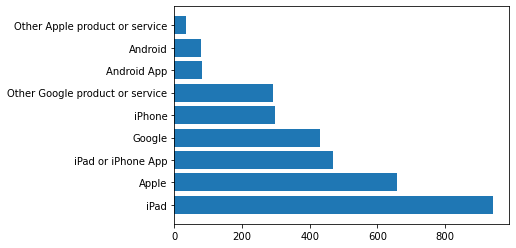

In [118]:
## Plotting the value counts of the products and brands in the dataset
plt.barh(tweet["directed_at"].value_counts().index, tweet["directed_at"].value_counts().values);

In [112]:
#Checking values for types of emotional categories
tweet["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [113]:
#Changing no emotion towards brand or product to neutral, dropping rows where emotions cant be assigned and renaming column to emotion
tweet["is_there_an_emotion_directed_at_a_brand_or_product"] = tweet["is_there_an_emotion_directed_at_a_brand_or_product"].map(lambda x: "Neutral Emotion" if x == "No emotion toward brand or product" else x)
tweet = tweet[tweet["is_there_an_emotion_directed_at_a_brand_or_product"] != "I can't tell"]
tweet.rename({'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'}, axis=1, inplace=True)

In [114]:
#Checking work
tweet["emotion"].value_counts()

Neutral Emotion     5389
Positive emotion    2978
Negative emotion     570
Name: emotion, dtype: int64

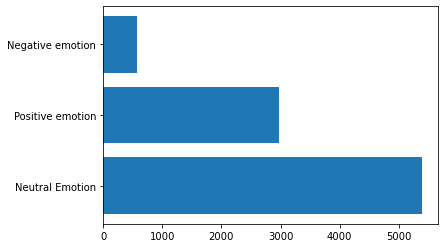

In [116]:
plt.barh(tweet["emotion"].value_counts().index, tweet["emotion"].value_counts().values);

It looks like most emotions are neutral and there are few negative emotions in our dataset